# Tuner

In [1]:
from adaptivetuning import Tuner
from adaptivetuning import Audiogenerator

<IPython.core.display.Javascript object>

A tuner is practically a wrapper for all the classes we have seen so far that controls their interaction in a multithreading environment.

In [2]:
import sc3nb
sc = sc3nb.startup()
#sc = None

Starting sclang...
Done.
Starting osc communication...
This sc3nb sc instance is at port: 57130
Done.
Registering UDP callback...
Done.
Booting server...
Done.
-> sc3nb started


In [3]:
tuner = Tuner(sc=sc, safe_session_log=True)

A tuner has an Audiogenerator, an Audioanalyzer, a Dissonancereduction object, and a Midiprocessing object. In general all their parameters (with the exception of the callbacks) can be changed just as we have seen in the previous examples.

In [4]:
tuner.audiogenerator.set_synth_def_with_dict(Audiogenerator.presets['piano'])

The default threshold of hearing used by Dissonancereduction is 20 microPascal.

In [16]:
tuner.dissonancereduction.amplitude_threshold

But since the amplitude values of our synthesizer don't represent the sound pressure values directly, we have to calibrate this parameter specifically for the machine we use. The easiest way to do that is by calling the test_amplitude_threshold function of our tuner and changing the amplitude_threshold until we barely hear the reference tone (a sine wave a 1 kHz).

In [34]:
tuner.test_amplitude_threshold()

In [35]:
tuner.dissonancereduction.amplitude_threshold = 0.00005

Now we can start the system with a midi controller and without fixed audio like this:

In [36]:
tuner.start()

Type 'a' for adaptive tuning, 'et' for 12TET, 'ji' for just intonation, or 'exit' to exit: exit


For observation, the results of the tuning can be saved in a session log. The function plot_session_log provides a convenient way to plot it.

In [8]:
from adaptivetuning import plot_session_log

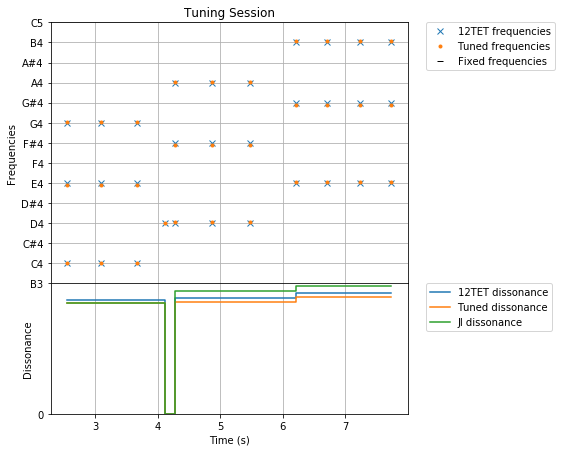

In [13]:
plot_session_log(tuner.session_log)

Play a midi file without fixed audio:

In [21]:
tuner.audio_lag = 1  # 1 second audio lag to tune the chords
tuner.audiogenerator.release_time = 0.01
tuner.safe_session_log = False
tuner.dissonancereduction.max_iterations = 15

In [22]:
tuner.start(midi_file="midi_files/BWV_0227.mid")

Type 'a' for adaptive tuning, 'et' for 12TET, 'ji' for just intonation, or 'exit' to exit: exit


We chose a small release time to mitigate the problem of chords bleeding into each other creating polychords that are hard to tune. Still, we got a similar problem with passing tones that are treated as chord tones creating complex and hard to tune chords. This is why especially the contrapuntal passages sound horrible.

Play with a midi controller with prerecorded environmental noise.

In [5]:
tuner.audio_lag = 0.3
tuner.safe_session_log = True

In [6]:
tuner.start(fixed_audio="audio_files/example_noise_2.wav")

Type 'a' for adaptive tuning, 'et' for 12TET, 'ji' for just intonation, or 'exit' to exit: exit


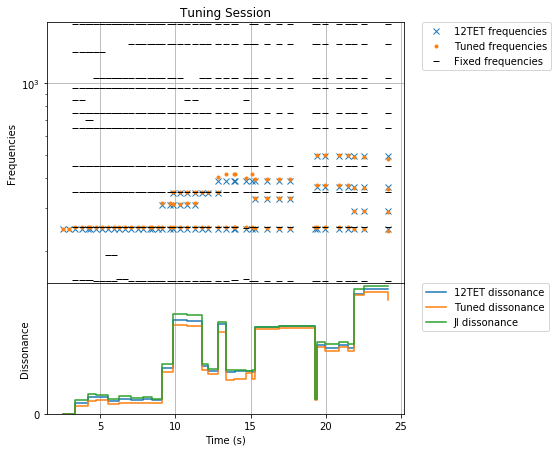

In [9]:
plot_session_log(tuner.session_log)

Unfortunately the tuner only tries to match frequencies of music and noise when they are already very close together (e.g. in this example it will tune a B3 from 247 Hz to the 250 Hz frequency in the noise), if not it tries to push them further away from each other which generally results in uncontrolled tunings.